In [2]:
from IPython.display import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import cassiopeia as cas
from cassiopeia.tools import fitch_hartigan, fitch_count
import networkx as nx
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
from enumeration import fitch_hartigan_enumeration, fitch_hartigan_print
from build_matrices import build_matrices, build_matrices_restricted, build_matrices_sankoff

In [3]:
tm = [None] * 101
rtm = [None] * 101
stm = [None] * 101
fc = [None] * 101

In [4]:
def show_plots(tm,fc,num):
    tm = tm[num]
    fc = fc[num]
    mask = np.zeros_like(tm)
    np.fill_diagonal(mask, 1)
    fig, axarr = plt.subplots(nrows = 1, ncols=2, figsize = (6, 3))
    sns.heatmap(tm,square=True,mask=mask,ax=axarr[0],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    sns.heatmap(fc,square=True,mask=mask,ax=axarr[1],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    axarr[0].set_title('CP0{} Co-migration F-H'.format(num))
    axarr[1].set_title('CP0{} FitchCount'.format(num))
    plt.tight_layout()
    plt.show()
def show_4_plots(tm,rtm,stm,fc,num):
    tm = tm[num] 
    rtm = rtm[num] 
    stm = stm[num] 
    fc = fc[num] 
    mask = np.zeros_like(fc)
    np.fill_diagonal(mask, 1)
    print("Co-migration F-H vs FitchCount mse:",mean_squared_error(tm,fc),"\nRestricted F-H vs FitcCount mse:",mean_squared_error(rtm,fc),"\nSankoff vs FitchCount mse:",mean_squared_error(stm,fc))
    print("Co-migration F-H vs FitchCount mae:",mean_absolute_error(tm,fc),"\nRestricted F-H vs FitcCount mae:",mean_absolute_error(rtm,fc),"\nSankoff vs FitchCount mae:",mean_absolute_error(stm,fc))
    fig, axarr = plt.subplots(nrows = 1, ncols=4, figsize = (12, 3))
    sns.heatmap(tm,square=True,mask=mask,ax=axarr[0],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    sns.heatmap(rtm,square=True,mask=mask,ax=axarr[1],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    sns.heatmap(stm,square=True,mask=mask,ax=axarr[2],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    sns.heatmap(fc,square=True,mask=mask,ax=axarr[3],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    axarr[0].set_title('CP0{} Co-migration F-H'.format(num))
    axarr[1].set_title('CP0{} Restricted F-H'.format(num))
    axarr[2].set_title('CP0{} Sankoff'.format(num))
    axarr[3].set_title('CP0{} FitchCount'.format(num))
    plt.tight_layout()
    plt.show()
def show_3_plots(tm,rtm,fc,num):
    tm = tm[num] 
    rtm = rtm[num] 
    fc = fc[num] 
    mask = np.zeros_like(fc)
    np.fill_diagonal(mask, 1)
    print("Co-migration F-H vs FitchCount mse:",mean_squared_error(tm,fc),"\nRestricted F-H vs FitcCount mse:",mean_squared_error(rtm,fc))
    print("Co-migration F-H vs FitchCount mae:",mean_absolute_error(tm,fc),"\nRestricted F-H vs FitcCount mae:",mean_absolute_error(rtm,fc))
    fig, axarr = plt.subplots(nrows = 1, ncols=3, figsize = (9, 3))
    sns.heatmap(tm,square=True,mask=mask,ax=axarr[0],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    sns.heatmap(rtm,square=True,mask=mask,ax=axarr[1],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    sns.heatmap(fc,square=True,mask=mask,ax=axarr[2],cmap="Reds", vmin = 0, vmax=1.0).set_facecolor('#bfbfbf')
    axarr[0].set_title('CP0{} Co-migration F-H'.format(num))
    axarr[1].set_title('CP0{} Restricted F-H'.format(num))
    axarr[2].set_title('CP0{} FitchCount'.format(num))
    plt.tight_layout()
    plt.show()

In [5]:
tm[70],fc[70] = build_matrices(70) # 8kb

/home/chunke/cs598MEB/trees/m5k_lg70_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
beginning enumeration
Number of trees: 6
Min comigrations: 5
Number of trees that obey min comigrations 2
raw Fitch-Hartigan enumeration transition matrix
      LL   RE   RW   M1   M2  Liv
LL   0.0  3.0  3.0  4.0  0.0  2.0
RE   0.0  0.0  1.0  0.0  0.0  0.0
RW   0.0  1.0  0.0  0.0  0.0  0.0
M1   0.0  0.0  0.0  0.0  0.0  0.0
M2   0.0  0.0  0.0  0.0  0.0  0.0
Liv  0.0  0.0  0.0  0.0  0.0  0.0
raw FitchCount transition matrix
      LL   RE   RW    M1   M2  Liv
LL   0.0  7.0  7.0  12.0  0.0  2.0
RE   1.0  0.0  3.0   0.0  0.0  1.0
RW   1.0  3.0  0.0   0.0  0.0  1.0
M1   0.0  0.0  0.0   0.0  0.0  0.0
M2   0.0  0.0  0.0   0.0  0.0  0.0
Liv  2.0  1.0  1.0   0.0  0.0  0.0
normalized Fitch-Hartigan enumeration transition matrix
      LL    RE    RW        M1   M2       Liv
LL   0.0  0.25  0.25  0.333333  0.0  0.166667
RE   0.0  0.00  1.00  0.000000  0.0  0.000000
RW   0.0  1.00  0.00  0.000

In [6]:
rtm[70] = build_matrices_restricted(70) # 8kb

/home/chunke/cs598MEB/trees/m5k_lg70_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
beginning enumeration
Number of trees: 2
Min comigrations: 5
Number of trees that obey min comigrations 2
raw restricted Fitch-Hartigan enumeration transition matrix
      LL   RE   RW   M1   M2  Liv
LL   0.0  3.0  3.0  4.0  0.0  2.0
RE   0.0  0.0  1.0  0.0  0.0  0.0
RW   0.0  1.0  0.0  0.0  0.0  0.0
M1   0.0  0.0  0.0  0.0  0.0  0.0
M2   0.0  0.0  0.0  0.0  0.0  0.0
Liv  0.0  0.0  0.0  0.0  0.0  0.0
normalized restricted Fitch-Hartigan enumeration transition matrix
      LL    RE    RW        M1   M2       Liv
LL   0.0  0.25  0.25  0.333333  0.0  0.166667
RE   0.0  0.00  1.00  0.000000  0.0  0.000000
RW   0.0  1.00  0.00  0.000000  0.0  0.000000
M1   0.0  0.00  0.00  0.000000  0.0  0.000000
M2   0.0  0.00  0.00  0.000000  0.0  0.000000
Liv  0.0  0.00  0.00  0.000000  0.0  0.000000
beginning writing to files


In [7]:
stm[70] = build_matrices_sankoff(70) # 8kb

/home/chunke/cs598MEB/trees/m5k_lg70_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
beginning enumeration
Number of trees: 990
Min comigrations: 4
Number of trees that obey min comigrations 540
raw Sankoff enumeration transition matrix
      LL      RE      RW      M1   M2    Liv
LL   0.0  1080.0  1080.0  1080.0  0.0  540.0
RE   0.0     0.0     0.0     0.0  0.0    0.0
RW   0.0     0.0     0.0     0.0  0.0    0.0
M1   0.0     0.0     0.0     0.0  0.0    0.0
M2   0.0     0.0     0.0     0.0  0.0    0.0
Liv  0.0     0.0     0.0     0.0  0.0    0.0
normalized Sankoff enumeration transition matrix
      LL        RE        RW        M1   M2       Liv
LL   0.0  0.285714  0.285714  0.285714  0.0  0.142857
RE   0.0  0.000000  0.000000  0.000000  0.0  0.000000
RW   0.0  0.000000  0.000000  0.000000  0.0  0.000000
M1   0.0  0.000000  0.000000  0.000000  0.0  0.000000
M2   0.0  0.000000  0.000000  0.000000  0.0  0.000000
Liv  0.0  0.000000  0.000000  0.000000  0.0  0.00000

Co-migration F-H vs FitchCount mse: 0.024253905265810033 
Restricted F-H vs FitcCount mse: 0.024253905265810033 
Sankoff vs FitchCount mse: 0.035640589569160996
Co-migration F-H vs FitchCount mae: 0.0775132275132275 
Restricted F-H vs FitcCount mae: 0.0775132275132275 
Sankoff vs FitchCount mae: 0.09126984126984128


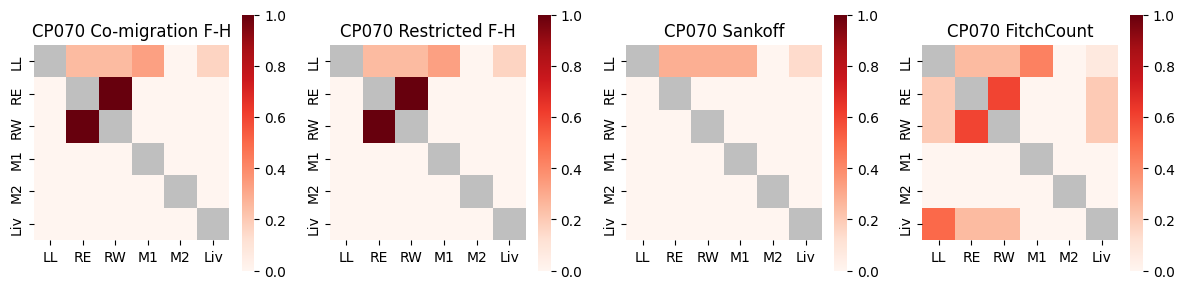

In [8]:
show_4_plots(tm,rtm,stm,fc,70)

In [9]:
tm[64],fc[64] = build_matrices(64) # 12kb

/home/chunke/cs598MEB/trees/m5k_lg64_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
beginning enumeration
Number of trees: 8
Min comigrations: 9
Number of trees that obey min comigrations 2
raw Fitch-Hartigan enumeration transition matrix
      LL   RE   RW   M1   M2  Liv
LL   0.0  0.0  0.0  0.0  0.0  0.0
RE   0.0  0.0  1.0  0.0  0.0  4.0
RW   0.0  1.0  0.0  0.0  0.0  0.0
M1   2.0  6.0  0.0  0.0  6.0  0.0
M2   2.0  5.0  3.0  4.0  0.0  0.0
Liv  0.0  0.0  0.0  0.0  0.0  0.0
raw FitchCount transition matrix
      LL    RE    RW    M1    M2  Liv
LL   0.0   0.0   0.0   0.0   0.0  0.0
RE   0.0   0.0   4.0   0.0   0.0  8.0
RW   0.0   4.0   0.0   0.0   0.0  0.0
M1   8.0  20.0   0.0   0.0  24.0  4.0
M2   8.0  16.0  12.0  16.0   0.0  4.0
Liv  0.0   8.0   0.0   0.0   0.0  0.0
normalized Fitch-Hartigan enumeration transition matrix
           LL        RE        RW        M1        M2  Liv
LL   0.000000  0.000000  0.000000  0.000000  0.000000  0.0
RE   0.000000  0.000000  0

In [10]:
rtm[64] = build_matrices_restricted(64) # 8kb

/home/chunke/cs598MEB/trees/m5k_lg64_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
beginning enumeration


Number of trees: 48
Min comigrations: 10
Number of trees that obey min comigrations 2
raw restricted Fitch-Hartigan enumeration transition matrix
      LL   RE   RW   M1   M2  Liv
LL   0.0  0.0  0.0  6.0  6.0  0.0
RE   0.0  0.0  1.0  0.0  0.0  4.0
RW   0.0  1.0  0.0  0.0  0.0  0.0
M1   2.0  6.0  0.0  0.0  0.0  0.0
M2   2.0  5.0  3.0  6.0  0.0  0.0
Liv  0.0  0.0  0.0  0.0  0.0  0.0
normalized restricted Fitch-Hartigan enumeration transition matrix
        LL      RE      RW     M1   M2  Liv
LL   0.000  0.0000  0.0000  0.500  0.5  0.0
RE   0.000  0.0000  0.2000  0.000  0.0  0.8
RW   0.000  1.0000  0.0000  0.000  0.0  0.0
M1   0.250  0.7500  0.0000  0.000  0.0  0.0
M2   0.125  0.3125  0.1875  0.375  0.0  0.0
Liv  0.000  0.0000  0.0000  0.000  0.0  0.0
beginning writing to files


Co-migration F-H vs FitchCount mse: 0.029332325522801714 
Restricted F-H vs FitcCount mse: 0.052915977733686066
Co-migration F-H vs FitchCount mae: 0.04312169312169312 
Restricted F-H vs FitcCount mae: 0.09718915343915346


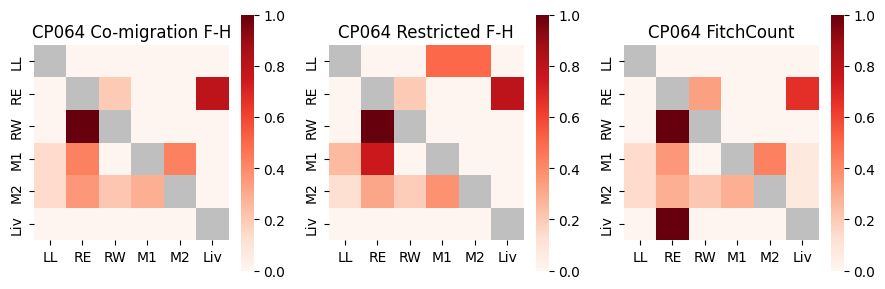

In [11]:
show_3_plots(tm,rtm,fc,64)

In [12]:
tm[43],fc[43] = build_matrices(43) # 30 kb

/home/chunke/cs598MEB/trees/m5k_lg43_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
beginning enumeration
Number of trees: 8
Min comigrations: 10
Number of trees that obey min comigrations 2
raw Fitch-Hartigan enumeration transition matrix
      LL   RE   RW   M1    M2  Liv
LL   0.0  0.0  1.0  2.0   1.0  0.0
RE   0.0  0.0  0.0  0.0   0.0  0.0
RW   0.0  0.0  0.0  0.0   2.0  2.0
M1   4.0  4.0  7.0  0.0  13.0  4.0
M2   0.0  0.0  2.0  2.0   0.0  0.0
Liv  0.0  0.0  0.0  0.0   0.0  0.0
raw FitchCount transition matrix
       LL    RE    RW   M1    M2   Liv
LL    0.0   0.0   4.0  8.0   4.0   0.0
RE    0.0   0.0   0.0  0.0   0.0   0.0
RW    0.0   0.0   0.0  0.0   6.0   4.0
M1   16.0  16.0  26.0  0.0  52.0  18.0
M2    0.0   0.0   6.0  8.0   0.0   2.0
Liv   0.0   0.0   4.0  0.0   2.0   0.0
normalized Fitch-Hartigan enumeration transition matrix
        LL     RE       RW   M1       M2    Liv
LL   0.000  0.000  0.25000  0.5  0.25000  0.000
RE   0.000  0.000  0.00000  0.0  

In [13]:
rtm[43] = build_matrices_restricted(43)

/home/chunke/cs598MEB/trees/m5k_lg43_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
beginning enumeration
Number of trees: 8
Min comigrations: 10
Number of trees that obey min comigrations 1
raw restricted Fitch-Hartigan enumeration transition matrix
      LL   RE   RW   M1   M2  Liv
LL   0.0  0.0  2.0  7.0  0.0  0.0
RE   0.0  0.0  0.0  0.0  0.0  0.0
RW   0.0  0.0  0.0  0.0  2.0  1.0
M1   1.0  2.0  3.0  0.0  6.0  2.0
M2   0.0  0.0  0.0  1.0  0.0  0.0
Liv  0.0  0.0  0.0  0.0  0.0  0.0
normalized restricted Fitch-Hartigan enumeration transition matrix
           LL        RE        RW        M1        M2       Liv
LL   0.000000  0.000000  0.222222  0.777778  0.000000  0.000000
RE   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
RW   0.000000  0.000000  0.000000  0.000000  0.666667  0.333333
M1   0.071429  0.142857  0.214286  0.000000  0.428571  0.142857
M2   0.000000  0.000000  0.000000  1.000000  0.000000  0.000000
Liv  0.000000  0.000000  0.000000  0

Co-migration F-H vs FitchCount mse: 0.016869273244598762 
Restricted F-H vs FitcCount mse: 0.030970641913851446
Co-migration F-H vs FitchCount mae: 0.04114583333333333 
Restricted F-H vs FitcCount mae: 0.07766754850088183


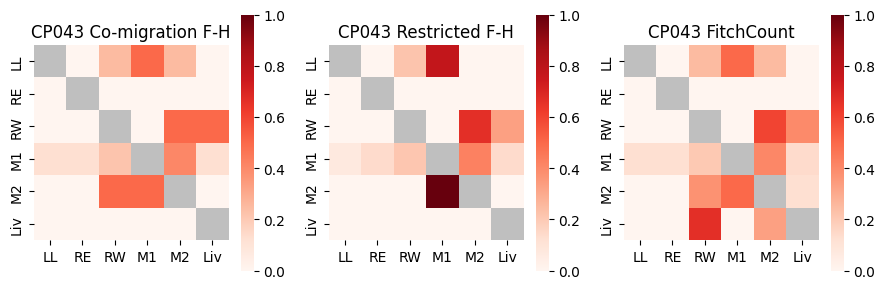

In [14]:
show_3_plots(tm,rtm,fc,43)

In [15]:
tm[21],fc[21] = build_matrices(21)

/home/chunke/cs598MEB/trees/m5k_lg21_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
beginning enumeration
Number of trees: 3840
Min comigrations: 16
Number of trees that obey min comigrations 16
raw Fitch-Hartigan enumeration transition matrix
       LL     RE     RW     M1     M2    Liv
LL    0.0    0.0    0.0    0.0    0.0    0.0
RE    0.0    0.0    0.0    0.0   56.0   16.0
RW   32.0   48.0    0.0   48.0    0.0    8.0
M1    0.0  168.0  104.0    0.0  120.0  136.0
M2   16.0   40.0   80.0  128.0    0.0   32.0
Liv  32.0    0.0    8.0    0.0    0.0    0.0
raw FitchCount transition matrix
         LL       RE       RW       M1       M2      Liv
LL      0.0      0.0   1920.0    768.0      0.0      0.0
RE    768.0      0.0   3648.0  12544.0  15808.0   3840.0
RW   5760.0  10560.0      0.0  12288.0   1920.0   1920.0
M1   1152.0  27264.0  23232.0      0.0  24512.0  32640.0
M2   3840.0  13120.0  15360.0  27136.0      0.0   7680.0
Liv  7680.0      0.0   1920.0      0.0    

In [16]:
rtm[21] = build_matrices_restricted(21)

/home/chunke/cs598MEB/trees/m5k_lg21_tree_hybrid_priors.alleleThresh.processed.txt
directory already exists
beginning enumeration
Number of trees: 1920
Min comigrations: 19
Number of trees that obey min comigrations 16
raw restricted Fitch-Hartigan enumeration transition matrix
       LL     RE    RW     M1     M2    Liv
LL    0.0   16.0  16.0   32.0    0.0    0.0
RE    0.0    0.0   0.0    0.0   56.0   16.0
RW   16.0   48.0   0.0   48.0    0.0    8.0
M1    0.0  152.0  88.0    0.0  120.0  136.0
M2   16.0   40.0  80.0  128.0    0.0   32.0
Liv  32.0    0.0   8.0    0.0    0.0    0.0
normalized restricted Fitch-Hartigan enumeration transition matrix
           LL        RE        RW        M1        M2       Liv
LL   0.000000  0.250000  0.250000  0.500000  0.000000  0.000000
RE   0.000000  0.000000  0.000000  0.000000  0.777778  0.222222
RW   0.133333  0.400000  0.000000  0.400000  0.000000  0.066667
M1   0.000000  0.306452  0.177419  0.000000  0.241935  0.274194
M2   0.054054  0.135135  0

Co-migration F-H vs FitchCount mse: 0.024285982237801856 
Restricted F-H vs FitcCount mse: 0.016900594430774563
Co-migration F-H vs FitchCount mae: 0.065991918258287 
Restricted F-H vs FitcCount mae: 0.06517495206765274


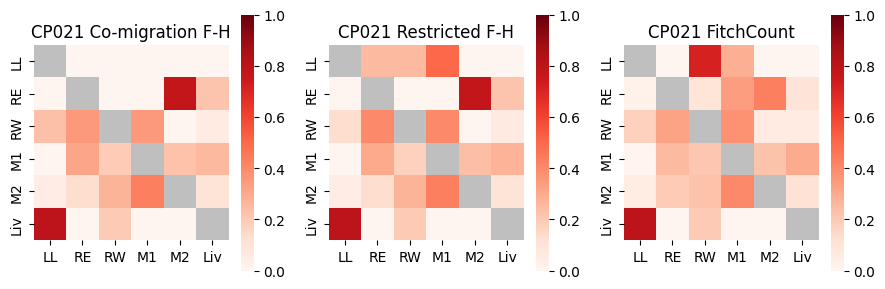

In [17]:
show_3_plots(tm,rtm,fc,21)

In [18]:
clones = [86,79,80,99,92,48,70]
for c in clones:
    try:
        print("Clone",c)
        print("F-H")
        tm[c],fc[c] = build_matrices(c,0)
        print("restricted F-H")
        rtm[c] = build_matrices_restricted(c,0)
        print("Sankoff")
        stm[c] = build_matrices_sankoff(c,0) 
    except:
        print("could not compute clone",c)

Clone 86
F-H
Number of trees: 2
Min comigrations: 3
Number of trees that obey min comigrations 2
restricted F-H
Number of trees: 1
Min comigrations: 5
Number of trees that obey min comigrations 1
Sankoff
Number of trees: 6
Min comigrations: 5
Number of trees that obey min comigrations 6
Clone 79
F-H
Number of trees: 6
Min comigrations: 3
Number of trees that obey min comigrations 6
restricted F-H
Number of trees: 2
Min comigrations: 4
Number of trees that obey min comigrations 2
Sankoff
Number of trees: 30
Min comigrations: 4
Number of trees that obey min comigrations 30
Clone 80
F-H
Number of trees: 4
Min comigrations: 4
Number of trees that obey min comigrations 4
restricted F-H
Number of trees: 2
Min comigrations: 5
Number of trees that obey min comigrations 2
Sankoff
Number of trees: 88
Min comigrations: 5
Number of trees that obey min comigrations 88
Clone 99
F-H
Number of trees: 1
Min comigrations: 6
Number of trees that obey min comigrations 1
restricted F-H
Number of trees: 8
M

Co-migration F-H vs FitchCount mse: 0.0 
Restricted F-H vs FitcCount mse: 0.014014865205341396 
Sankoff vs FitchCount mse: 0.014014865205341396
Co-migration F-H vs FitchCount mae: 0.0 
Restricted F-H vs FitcCount mae: 0.030423280423280425 
Sankoff vs FitchCount mae: 0.030423280423280425


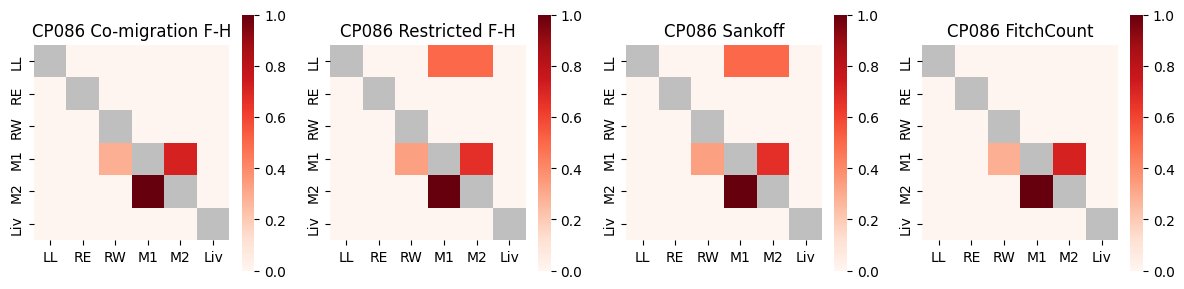

In [19]:
show_4_plots(tm,rtm,stm,fc,86)

Co-migration F-H vs FitchCount mse: 0.0 
Restricted F-H vs FitcCount mse: 0.04188271604938273 
Sankoff vs FitchCount mse: 0.041196844993141295
Co-migration F-H vs FitchCount mae: 0.0 
Restricted F-H vs FitcCount mae: 0.1277777777777778 
Sankoff vs FitchCount mae: 0.1277777777777778


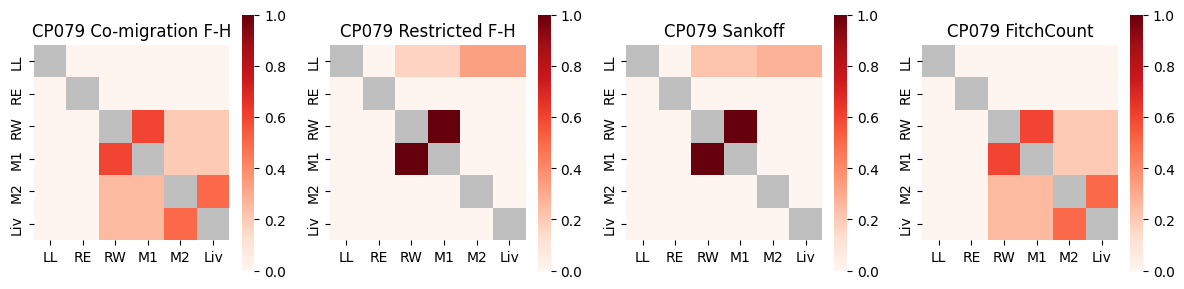

In [20]:
show_4_plots(tm,rtm,stm,fc,79)

Co-migration F-H vs FitchCount mse: 0.0 
Restricted F-H vs FitcCount mse: 0.04319444444444445 
Sankoff vs FitchCount mse: 0.043533333333333334
Co-migration F-H vs FitchCount mae: 0.0 
Restricted F-H vs FitcCount mae: 0.06666666666666667 
Sankoff vs FitchCount mae: 0.06666666666666667


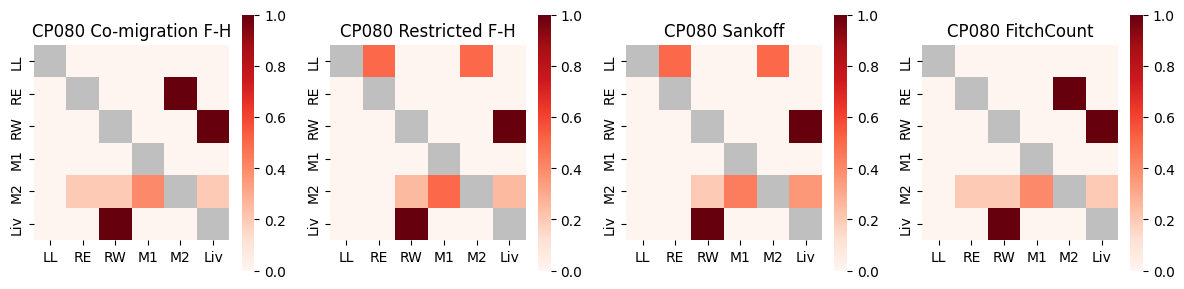

In [21]:
show_4_plots(tm,rtm,stm,fc,80)

Co-migration F-H vs FitchCount mse: 0.0 
Restricted F-H vs FitcCount mse: 0.05777391975308641 
Sankoff vs FitchCount mse: 0.022463531317742248
Co-migration F-H vs FitchCount mae: 0.0 
Restricted F-H vs FitcCount mae: 0.11712962962962964 
Sankoff vs FitchCount mae: 0.06165311653116531


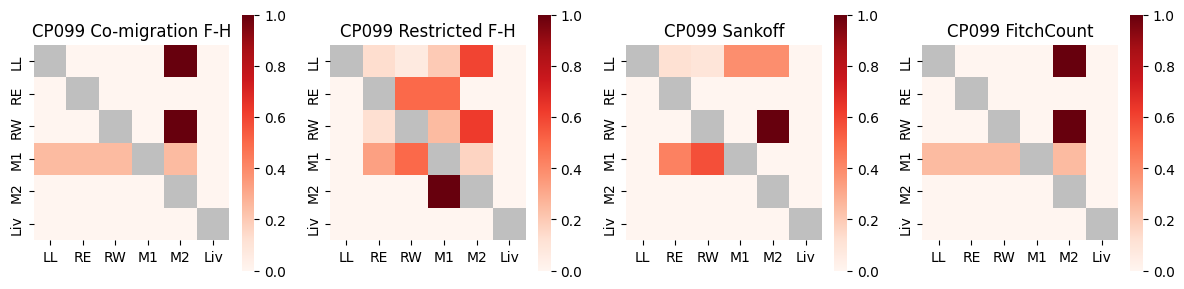

In [22]:
show_4_plots(tm,rtm,stm,fc,99)

Co-migration F-H vs FitchCount mse: 0.0 
Restricted F-H vs FitcCount mse: 0.014722222222222222 
Sankoff vs FitchCount mse: 0.033124999999999995
Co-migration F-H vs FitchCount mae: 0.0 
Restricted F-H vs FitcCount mae: 0.03888888888888888 
Sankoff vs FitchCount mae: 0.08333333333333333


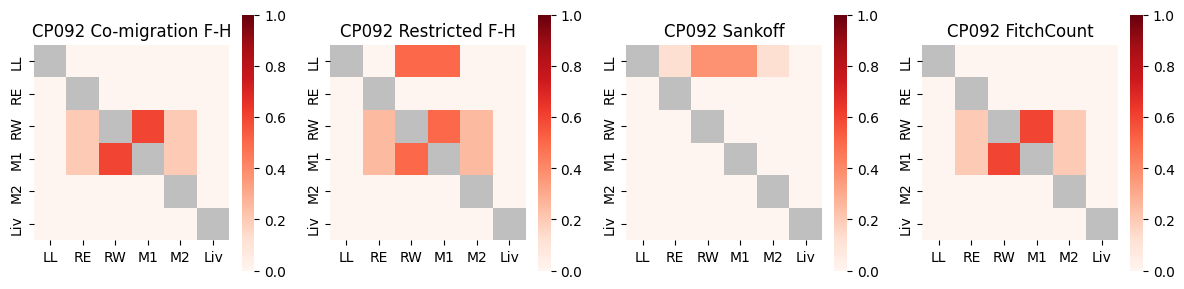

In [23]:
show_4_plots(tm,rtm,stm,fc,92)

Co-migration F-H vs FitchCount mse: 0.0 
Restricted F-H vs FitcCount mse: 0.027777777777777776 
Sankoff vs FitchCount mse: 0.016758494031221306
Co-migration F-H vs FitchCount mae: 0.0 
Restricted F-H vs FitcCount mae: 0.027777777777777776 
Sankoff vs FitchCount mae: 0.027777777777777776


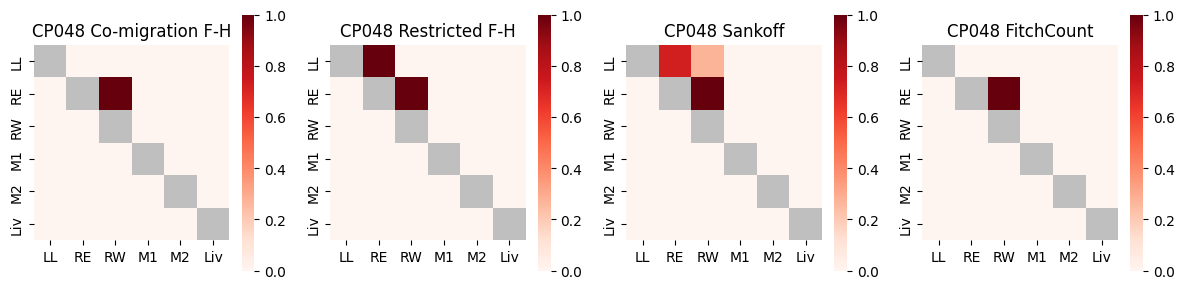

In [24]:
show_4_plots(tm,rtm,stm,fc,48)